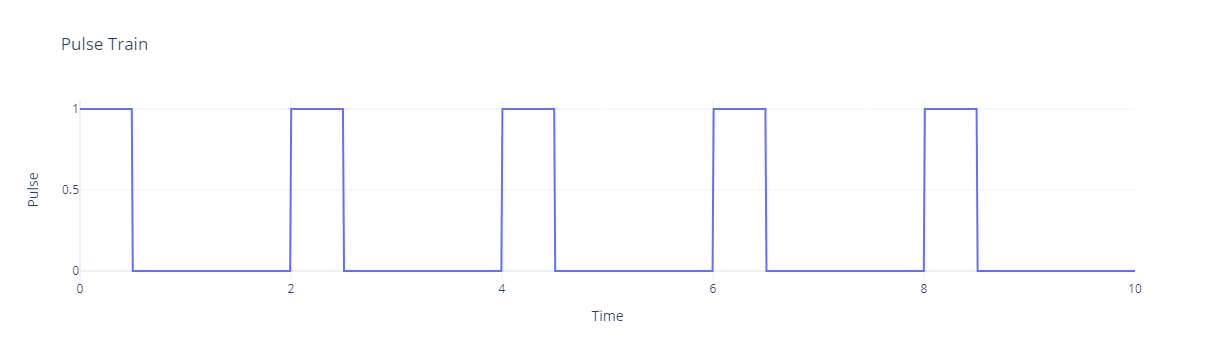

In [5]:
from sympy import symbols, Piecewise, And
import numpy as np
import plotly.express as px
import pandas as pd

# Define the time variable
t = symbols('t')

# Define the pulse function
def pulse(t, start, width):
    return Piecewise(
        (1, And(t >= start, t < start + width)),
        (0, True)
    )

# Define a pulse train that operates over a specified time length
def pulse_train(t, pulse_width, period, total_time):
    # Calculate the number of pulses that fit within the total time
    num_pulses = int(total_time // period)
    
    # Generate the pulse train expression
    return sum(pulse(t, start=i*period, width=pulse_width) for i in range(num_pulses))

# Parameters for the pulse train
pulse_width = 0.5  # Width of each pulse
period = 2  # Period of the pulse train
total_time = 10  # Total time length of the pulse train

# Generate the pulse train expression
pulse_train_expr = pulse_train(t, pulse_width, period, total_time)

# Step 2: Generate Data for Plotting
t_vals = np.linspace(0, total_time, 1000)  # time from 0 to total_time
pulse_vals = [float(pulse_train_expr.subs(t, val).evalf() )for val in t_vals]

# Step 3: Populate a Pandas DataFrame
df = pd.DataFrame({'Time': t_vals, 'Pulse': pulse_vals})

# Step 4: Plot the Data Using Plotly Express
fig = px.line(df, x='Time', y='Pulse', title='Pulse Train')
fig.show()
